# Multiple Linear Regression

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats

%matplotlib inline

![mlr](https://miro.medium.com/max/1280/1*lJKFo3yyZaFIx4ET1dLmlg.png)

## Agenda

SWBAT:

- conduct linear regressions in `statsmodels` and in `sklearn`;
- use the one-hot strategy to encode categorical variables.

## Regression with Multiple Predictors

The main idea here is pretty simple. Whereas, in simple linear regression we took our dependent variable to be a function only of a single independent variable, here we'll be taking the dependent variable to be a function of multiple independent variables.

Our regression equation, then, instead of looking like $\hat{y} = mx + b$, will now look like:

$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1x_1 + ... + \hat{\beta}_nx_n$.

Remember that the hats ( $\hat{}$ ) indicate parameters that are estimated.

Is this still a best-fit *line*? Well, no. What does the graph of, say, z = x + y look like? [Here's](https://academo.org/demos/3d-surface-plotter/) a 3d-plotter. (Of course, once we get x's with subscripts beyond 2 it's going to be very hard to visualize. But in practice linear regressions can make use of dozens or even of hundreds of independent variables!)

Is it possible to calculate the betas by hand? Yes, a multiple regression problem still has a closed-form solution:

In a word, for a multiple linear regression problem where $X$ is the matrix of independent variable values and $y$ is the vector of dependent variable values, the vector of optimizing regression coefficients $\vec{b}$ is given by:

$\vec{b} = (X^TX)^{-1}X^Ty$.

We'll focus more directly on matrix mathematics later in the course, so don't worry if this equation is opaque to you. See [here](https://stattrek.com/multiple-regression/regression-coefficients.aspx) for a nice explanation and example.

## Confounding Variables

Suppose I have a simple linear regression that models the growth of corn plants as a function of the temperature of the ambient air. And suppose there is a noticeable positive correlation between temperature and plant height.

In [2]:
corn = pd.read_csv('data/corn.csv',
                  usecols=['temp', 'humid', 'height'])

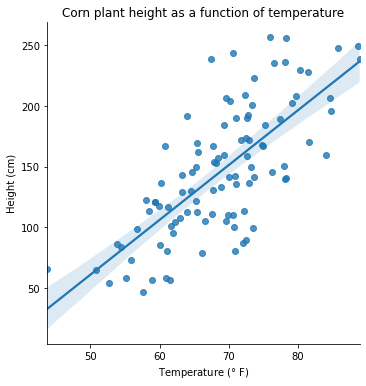

In [3]:
sns.lmplot(data=corn, x='temp', y='height')
plt.xlabel('Temperature ($\degree$ F)')
plt.ylabel('Height (cm)')
plt.title('Corn plant height as a function of temperature');

In [4]:
corn.head()

,temp,humid,height
0,58.086965,49.848304,122.222368
1,70.582087,22.855446,110.079666
2,75.868571,72.856834,256.812528
3,74.732376,38.907566,167.889601
4,77.384666,42.570524,188.914312


It seems that higher temperatures lead to taller corn plants. But it's hard to know for sure. One **confounding variable** might be *humidity*. If we haven't controlled for humidity, then it's difficult to draw conclusions.

One solution is to use **both features** in a single model.

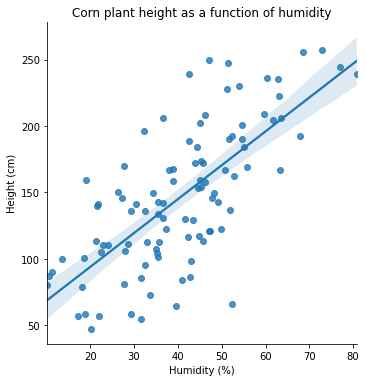

In [5]:
sns.lmplot(data=corn, x='humid', y='height')
plt.xlabel('Humidity (%)')
plt.ylabel('Height (cm)')
plt.title('Corn plant height as a function of humidity');

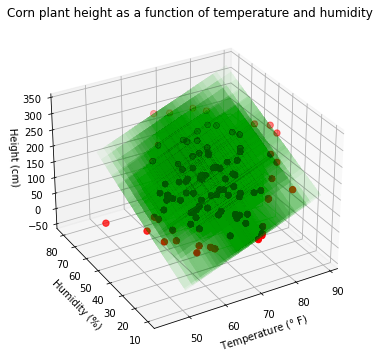

In [6]:
ax = plt.figure(figsize=(8, 6)).add_subplot(111, projection='3d')
ax.scatter(corn['temp'], corn['humid'], corn['height'],
           depthshade=True, s=40, color='#ff0000')
# create x,y
xx, yy = np.meshgrid(corn['temp'], corn['humid'])

# calculate corresponding z
z = 4.3825 * xx + 2.4693 * yy - 255.5434

# plot the surface
ax.plot_surface(xx, yy, z, alpha=0.01, color='#00ff00')

ax.view_init(30, azim=240)
ax.set_xlabel('Temperature ($\degree$ F)')
ax.set_ylabel('Humidity (%)')
ax.set_zlabel('Height (cm)')
plt.title('Corn plant height as a function of temperature and humidity');

One risk we run when adding more predictors to a model is that their correlations with the target may be nearly *collinear* with each other. This can make it difficult to determine which predictor is doing the heavy lifting. We shall explore this theme of **multicollinearity** in more depth in due course.

## Dealing with Categorical Variables

One issue we'd like to resolve is what to do with categorical variables, i.e. variables that represent categories rather than continua. In a Pandas DataFrame, these columns may well have strings or objects for values, but they need not. A certain heart-disease dataset from Kaggle, for example, has a target variable that takes values 0-4, each representing a different stage of heart disease.

### Dummying

One very effective way of dealing with categorical variables is to dummy them out. What this involves is making a new column for _each categorical value in the column we're dummying out_.

These new columns will be filled only with 0's and 1's, a 1 representing the presence of the relevant categorical value.

Let's look at a simple example:

In [7]:
comma_use = pd.read_csv('data/comma-survey.csv')

For more on this dataset see [here](https://fivethirtyeight.com/features/elitist-superfluous-or-popular-we-polled-americans-on-the-oxford-comma/).

In [8]:
comma_use.head()

,RespondentID,"In your opinion, which sentence is more gramatically correct?","Prior to reading about it above, had you heard of the serial (or Oxford) comma?","How much, if at all, do you care about the use (or lack thereof) of the serial (or Oxford) comma in grammar?",How would you write the following sentence?,"When faced with using the word ""data"", have you ever spent time considering if the word was a singular or plural noun?","How much, if at all, do you care about the debate over the use of the word ""data"" as a singluar or plural noun?","In your opinion, how important or unimportant is proper use of grammar?",Gender,Age,Household Income,Education,Location (Census Region)
0,3292953864,"It's important for a person to be honest, kind...",Yes,Some,"Some experts say it's important to drink milk,...",No,Not much,Somewhat important,Male,30-44,"$50,000 - $99,999",Bachelor degree,South Atlantic
1,3292950324,"It's important for a person to be honest, kind...",No,Not much,"Some experts say it's important to drink milk,...",No,Not much,Somewhat unimportant,Male,30-44,"$50,000 - $99,999",Graduate degree,Mountain
2,3292942669,"It's important for a person to be honest, kind...",Yes,Some,"Some experts say it's important to drink milk,...",Yes,Not at all,Very important,Male,30-44,NaN,NaN,East North Central
3,3292932796,"It's important for a person to be honest, kind...",Yes,Some,"Some experts say it's important to drink milk,...",No,Some,Somewhat important,Male,18-29,NaN,Less than high school degree,Middle Atlantic
4,3292932522,"It's important for a person to be honest, kind...",No,Not much,"Some experts say it's important to drink milk,...",No,Not much,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
comma_use['In your opinion, which sentence is more gramatically correct?'].value_counts()

It's important for a person to be honest, kind, and loyal.    641
It's important for a person to be honest, kind and loyal.     488
Name: In your opinion, which sentence is more gramatically correct?, dtype: int64

In [10]:
comma_use.shape

(1129, 13)

In [11]:
comma_use.isna().sum().sum() #sum twice to get the sum of all values, not just sum of na's per column

924

In [12]:
comma_use.dropna(inplace=True)

In [13]:
comma_use.shape

(825, 13)

In [14]:
# Let's try using sklearn's OneHotEncoder to create our dummy columns:

ohe = OneHotEncoder(drop='first') # drops first value dataframe comes across 
comma_trans = ohe.fit_transform(comma_use.drop('RespondentID', axis=1))

Could we have used ```pd.get_dummies()``` instead?

Well, yes. And in fact ```get_dummies()``` is in some ways easier; for one thing, it's built right into Pandas. But there are drawbacks with it as well. The main advantage of the `sklearn` tool is that it stores information about the columns and creates a persistent function that can be used on future data of the same form. See [this page](https://stackoverflow.com/questions/36631163/pandas-get-dummies-vs-sklearns-onehotencoder-what-are-the-pros-and-cons) for more.

In [18]:
pd.get_dummies(comma_use.drop('RespondentID', axis=1))

,"In your opinion, which sentence is more gramatically correct?_It's important for a person to be honest, kind and loyal.","In your opinion, which sentence is more gramatically correct?_It's important for a person to be honest, kind, and loyal.","Prior to reading about it above, had you heard of the serial (or Oxford) comma?_No","Prior to reading about it above, had you heard of the serial (or Oxford) comma?_Yes","How much, if at all, do you care about the use (or lack thereof) of the serial (or Oxford) comma in grammar?_A lot","How much, if at all, do you care about the use (or lack thereof) of the serial (or Oxford) comma in grammar?_Not at all","How much, if at all, do you care about the use (or lack thereof) of the serial (or Oxford) comma in grammar?_Not much","How much, if at all, do you care about the use (or lack thereof) of the serial (or Oxford) comma in grammar?_Some","How would you write the following sentence?_Some experts say it's important to drink milk, but the data are inconclusive.","How would you write the following sentence?_Some experts say it's important to drink milk, but the data is inconclusive.",...,Education_Some college or Associate degree,Location (Census Region)_East North Central,Location (Census Region)_East South Central,Location (Census Region)_Middle Atlantic,Location (Census Region)_Mountain,Location (Census Region)_New England,Location (Census Region)_Pacific,Location (Census Region)_South Atlantic,Location (Census Region)_West North Central,Location (Census Region)_West South Central
0,1,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,1,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
5,0,1,1,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
6,0,1,0,1,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
7,0,1,0,1,1,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,0,1,0,1,1,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1125,1,0,1,0,0,0,0,1,0,1,...,1,0,0,0,0,0,1,0,0,0
1126,0,1,0,1,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1127,1,0,0,1,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


So what did the encoder do?

In [15]:
comma_trans

<825x34 sparse matrix of type '<class 'numpy.float64'>'
	with 7174 stored elements in Compressed Sparse Row format>

In [16]:
comma_trans.todense()

matrix([[0., 1., 0., ..., 1., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]])

In [17]:
ohe.get_feature_names()

array(["x0_It's important for a person to be honest, kind, and loyal.",
       'x1_Yes', 'x2_Not at all', 'x2_Not much', 'x2_Some',
       "x3_Some experts say it's important to drink milk, but the data is inconclusive.",
       'x4_Yes', 'x5_Not at all', 'x5_Not much', 'x5_Some',
       'x6_Somewhat important', 'x6_Somewhat unimportant',
       'x6_Very important', 'x6_Very unimportant', 'x7_Male', 'x8_30-44',
       'x8_45-60', 'x8_> 60', 'x9_$100,000 - $149,999', 'x9_$150,000+',
       'x9_$25,000 - $49,999', 'x9_$50,000 - $99,999',
       'x10_Graduate degree', 'x10_High school degree',
       'x10_Less than high school degree',
       'x10_Some college or Associate degree', 'x11_East South Central',
       'x11_Middle Atlantic', 'x11_Mountain', 'x11_New England',
       'x11_Pacific', 'x11_South Atlantic', 'x11_West North Central',
       'x11_West South Central'], dtype=object)

In [19]:
df = pd.DataFrame(comma_trans.todense(), columns=ohe.get_feature_names())
df.head()

,"x0_It's important for a person to be honest, kind, and loyal.",x1_Yes,x2_Not at all,x2_Not much,x2_Some,"x3_Some experts say it's important to drink milk, but the data is inconclusive.",x4_Yes,x5_Not at all,x5_Not much,x5_Some,...,x10_Less than high school degree,x10_Some college or Associate degree,x11_East South Central,x11_Middle Atlantic,x11_Mountain,x11_New England,x11_Pacific,x11_South Atlantic,x11_West North Central,x11_West South Central
0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Multiple Regression in `statsmodels`

Let's build a multiple regression with `statsmodels`. Let's start with a toy model:

In [20]:
centers = np.arange(1, 6)
preds = np.array([stats.norm(loc=center, scale=3).rvs(200) for center in centers]).T
preds_df = pd.DataFrame(preds, columns=[f'var{center}' for center in centers])

target = preds_df['var1'] + 2*preds_df['var2'] + 3*preds_df['var3']\
    + 4*preds_df['var4'] + 5*preds_df['var5']
target_df = pd.DataFrame(target, columns=['target'])

In [21]:
df = pd.concat([preds_df, target_df], axis=1)

df.head()

,var1,var2,var3,var4,var5,target
0,-1.120300,4.620358,2.345966,6.819184,5.836570,71.617899
1,-1.803932,-1.151725,12.556176,0.742295,2.615647,49.608562
2,1.064908,-4.792104,3.693810,8.302497,0.076959,36.156915
3,0.824654,6.998546,2.078455,4.757447,5.075563,65.464714
4,5.031244,6.302105,2.896550,9.130495,1.652091,71.107542


In [22]:
X = df.drop('target', axis=1)
y = df['target']

In [23]:
model = sm.OLS(endog=y, exog=X).fit() #ordinary least squares

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.565e+32
Date:                Tue, 02 Mar 2021   Prob (F-statistic):                        0.00
Time:                        14:06:49   Log-Likelihood:                          6027.9
No. Observations:                 200   AIC:                                 -1.205e+04
Df Residuals:                     195   BIC:                                 -1.203e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
var1           1.0000   4.65e-16   2.15e+15      0.000       1.000       1.000
var2           2.0000    4.9e-16   4.08e+15      0.000       2.000       2.000
var3           3.0000   3.93e-16   7.63e+15      0.000       3.000       3.000
var4           4.0000   4.04e-16   9.91e+15      0.000       4.000       4.000
var5           5.0000   3.54e-16   1.41e+16      0.000       5.000       5.000
==============================================================================
Omnibus:                        1.098   Durbin-Watson:                   1.288
Prob(Omnibus):                  0.578   Jarque-Bera (JB):                0.825
Skew:                          -0.144   Prob(JB):                        0.662
Kurtosis:                       3.129   Cond. No.                         3.01
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Diamonds Dataset

In [4]:
data = sns.load_dataset('diamonds')

In [2]:
data = sns.load_dataset('diamonds', usecols=['carat',
                                            'depth',
                                            'table',
                                            'price',
                                            'x',
                                            'y',
                                            'z'])

KeyError: 'color'

In [5]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
X, y = data.drop('price', axis=1), data['price']

In [7]:
model2 = sm.OLS(y, X).fit()
model2.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [33]:
sm.graphics.plot_regress_exog(model2, 'carat', fig=plt.figure(figsize=(12, 8)));

NameError: name 'model2' is not defined

#### Check distribution of target

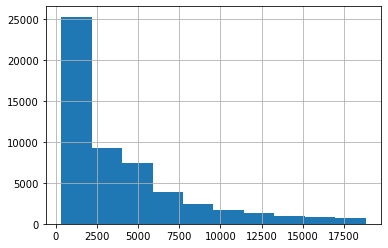

In [8]:
y.hist();

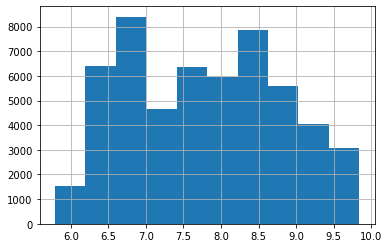

In [9]:
y_scld = np.log(y)
y_scld.hist();

#### Build model with log-scaled target

In [10]:
model3 = sm.OLS(y_scld, X).fit()
model3.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
sm.graphics.plot_regress_exog(model3, 'carat', fig=plt.figure(figsize=(12, 8)));

**Remember that $R^2$ can be negative!**

In [ ]:
bad_pred = np.mean(y) * np.ones(len(y))
worse_pred = (np.mean(y) + 1000) * np.ones(len(y))

print(metrics.r2_score(y, bad_pred))
print(metrics.r2_score(y, worse_pred))

#### Wine Dataset

In [ ]:
wine = pd.read_csv('data/wine.csv')

wine.head()

In [ ]:
wine['quality'].value_counts()

In [ ]:
wine['red_wine'].value_counts()

In [ ]:
wine.info()

In [ ]:
wine.describe()

## Scaling

Before we construct a linear regression, let's *scale* our columns by z-scores. Why?

In a word, it's useful to have all of our variables be on the same scale, so that the resulting coefficients are easier to interpret. If, moreover, the scales of the variables are very different one from another, then some of the coefficients may end up on very large or very tiny scales.

For more on this, see [this post](https://stats.stackexchange.com/questions/32649/some-of-my-predictors-are-on-very-different-scales-do-i-need-to-transform-them).

Let's try a model with our wine dataset now.

In [ ]:
# We'll include all the columns for now.

wine_preds = wine.drop('quality', axis=1)
wine_target = wine['quality']

wine_preds_scaled = (wine_preds - np.mean(wine_preds)) / np.std(wine_preds)

In [ ]:
predictors = sm.add_constant(wine_preds_scaled)
model = sm.OLS(wine_target, predictors).fit()
model.summary()

## Multiple Regression in Scikit-Learn

In [ ]:
# Let's create a StandardScaler object to scale our data for us.
ss = StandardScaler()


# Now we'll apply it to our data by using the .fit() and .transform() methods.

ss.fit(wine_preds)

wine_preds_st_scaled = ss.transform(wine_preds)

In [ ]:
np.allclose(wine_preds_st_scaled, wine_preds_scaled)

In [ ]:
wine_preds.head()

In [ ]:
wine_preds_st_scaled[:5, :]

In [ ]:
# Now we can fit a LinearRegression object to our training data!

lr = LinearRegression()
lr.fit(wine_preds_st_scaled, wine_target)

In [ ]:
# We can use the .coef_ attribute to recover the results
# of the regression.

lr.coef_

In [ ]:
lr.intercept_

In [ ]:
lr.score(wine_preds_st_scaled, wine_target)

In [ ]:
lr.predict(wine_preds_st_scaled)

## Sklearn Metrics

The metrics module in sklearn has a number of metrics that we can use to meaure the accuracy of our model, including the $R^2$ score, the mean absolute error and the mean squared error. Note that the default 'score' on our model object is the $R^2$ score. Let's go back to our wine dataset:

In [ ]:
metrics.r2_score(wine_target, lr.predict(wine_preds_st_scaled))

Let's make sure this metric is properly calibrated. If we put simply $\bar{y}$ as our prediction, then we should get an $R^2$ score of *0*. And if we predict, say, $\bar{y} + 1$, then we should get a *negative* $R^2$ score.

In [ ]:
avg_quality = np.mean(wine_target)
num = len(wine_target)

metrics.r2_score(wine_target, avg_quality * np.ones(num))

In [ ]:
metrics.r2_score(wine_target, (avg_quality + 1) * np.ones(num))

In [ ]:
metrics.mean_absolute_error(wine_target, lr.predict(wine_preds_st_scaled))

In [ ]:
metrics.mean_squared_error(wine_target, lr.predict(wine_preds_st_scaled))

## Regression with Categorical Features: Back to the Comma Dataset

In [ ]:
comma_use.columns

In [ ]:
df.columns

In [ ]:
# We'll try to predict the first column of df: the extent to which
# the person accepts the sentence
# without the Oxford comma as more grammatically correct.

comma_target = df['x0_It\'s important for a person to be honest, kind, and loyal.']

comma_predictors = df[['x8_30-44',
       'x8_45-60', 'x8_> 60', 'x9_$100,000 - $149,999',
       'x9_$150,000+', 'x9_$25,000 - $49,999', 'x9_$50,000 - $99,999']]

comma_lr = LinearRegression()

comma_lr.fit(comma_predictors, comma_target)

In [ ]:
comma_lr.score(comma_predictors, comma_target)

In [ ]:
comma_lr.coef_

In [ ]:
df.corr()['x0_It\'s important for a person to be honest, kind, and loyal.']

For more on the interpretation of regression coefficients for categorical variables, see [Erin's repo](https://github.com/hoffm386/coefficients-of-dropped-categorical-variables).